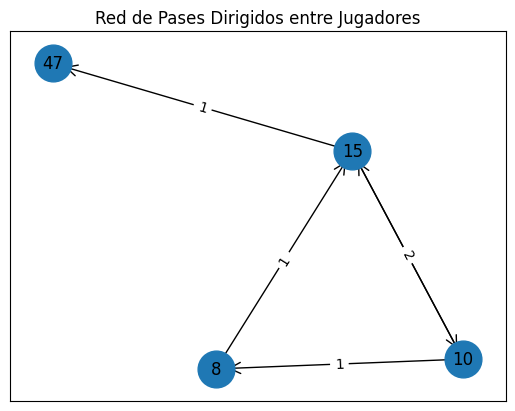

In [10]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '05_normal_short_1_passes.csv'  # Reemplaza esto con la ruta a tu archivo
# file_path = '01_Inicio_1_passes.csv'
passes_df = pd.read_csv(file_path)

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos (jugadores)
players = set(passes_df['Passer (id)']).union(set(passes_df['Receiver (id)']))
G.add_nodes_from(players)

# Agregar aristas (pases dirigidos) y contar el número de pases
for _, row in passes_df.iterrows():
    passer = row['Passer (id)']
    receiver = row['Receiver (id)']
    if G.has_edge(passer, receiver):
        G[passer][receiver]['weight'] += 1
    else:
        G.add_edge(passer, receiver, weight=1)

# Dibujar el grafo dirigido
pos = nx.spring_layout(G)  # Posiciones de los nodos

# Dibujar nodos
nx.draw_networkx_nodes(G, pos, node_size=700)

# Dibujar etiquetas de los nodos
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

# Dibujar aristas y sus etiquetas
edges = G.edges(data=True)
edge_labels = {}
for u, v, data in edges:
    if (v, u) in edge_labels:
        edge_labels[(v, u)] += data['weight']
    else:
        edge_labels[(u, v)] = data['weight']

nx.draw_networkx_edges(G, pos, edgelist=edges, arrowstyle='->', arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title('Red de Pases Dirigidos entre Jugadores')
plt.show()

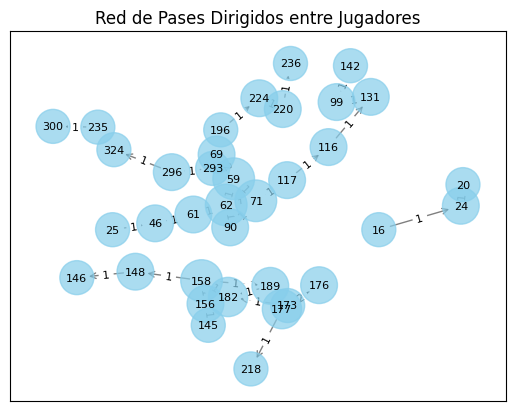

In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Cargar el archivo CSV
# file_path = '05_normal_short_1_passes.csv'  # Reemplaza esto con la ruta a tu archivo
file_path = '01_Inicio_1_passes.csv'
passes_df = pd.read_csv(file_path)

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos (jugadores)
players = set(passes_df['Passer (id)']).union(set(passes_df['Receiver (id)']))
G.add_nodes_from(players)

# Agregar aristas (pases dirigidos) y contar el número de pases
for _, row in passes_df.iterrows():
    passer = row['Passer (id)']
    receiver = row['Receiver (id)']
    if G.has_edge(passer, receiver):
        G[passer][receiver]['weight'] += 1
    else:
        G.add_edge(passer, receiver, weight=1)

# Ajustar el tamaño de los nodos según el grado (número de conexiones) del nodo
node_sizes = [500 + 100 * G.degree(n) for n in G.nodes()]

# Usar un layout más adecuado para grafos densos
pos = nx.spring_layout(G, k=0.15, iterations=20)  # Ajustar el valor de k según sea necesario

# Dibujar nodos con tamaños ajustados
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.7)

# Dibujar etiquetas de los nodos
nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')

# Dibujar aristas y sus etiquetas
edges = G.edges(data=True)
edge_labels = {}
for u, v, data in edges:
    if (v, u) in edge_labels:
        edge_labels[(v, u)] += data['weight']
    else:
        edge_labels[(u, v)] = data['weight']

nx.draw_networkx_edges(G, pos, edgelist=edges, arrowstyle='->', arrowsize=10, alpha=0.5)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title('Red de Pases Dirigidos entre Jugadores')
plt.show()



In [1]:
import pandas as pd
import networkx as nx
from pyvis.network import Network

# Cargar el archivo CSV
file_path = '05_normal_short_1_passes.csv'  # Reemplaza esto con la ruta a tu archivo
file_path = '01_Inicio_1_passes.csv'
file_path = '09_Inicio_normal_4_passes.csv'
passes_df = pd.read_csv(file_path)

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos (jugadores)
players = set(passes_df['Passer (id)']).union(set(passes_df['Receiver (id)']))
G.add_nodes_from(players)

# Agregar aristas (pases dirigidos) y contar el número de pases
for _, row in passes_df.iterrows():
    passer = row['Passer (id)']
    receiver = row['Receiver (id)']
    if G.has_edge(passer, receiver):
        G[passer][receiver]['weight'] += 1
    else:
        G.add_edge(passer, receiver, weight=1)

# Crear una red interactiva con pyvis
net = Network(notebook=True, height='750px', width='100%', directed=True)

# Agregar nodos con sus etiquetas
for node in G.nodes():
    net.add_node(node, label=str(node))

# Agregar aristas con el peso (número de pases) como etiquetas
for edge in G.edges(data=True):
    src, dst, data = edge
    net.add_edge(src, dst, value=data['weight'], title=f'Pases: {data["weight"]}', label=str(data['weight']))

# Opciones de diseño y física
net.repulsion(node_distance=200, central_gravity=0.33, spring_length=200, spring_strength=0.10, damping=0.95)

# Generar y mostrar la visualización interactiva
net.show('network.html')


network.html
